In [3]:
from torchvision import transforms
import torch

# Now you can define the pipeline
custom_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [4]:
from torchvision import transforms
import torch

# تعريف التحويلات (Task 1)
custom_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# هذا الأمر سيظهر لك تفاصيل التحويل للتأكد من وجوده
print("تم إنشاء التحويل بنجاح، وهذه تفاصيله:")
print(custom_transform)

تم إنشاء التحويل بنجاح، وهذه تفاصيله:
Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.2)
    RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


In [6]:
import os

# 1. تحديد مجلد الاستخراج (كما تم في بداية المختبر)
extract_dir = "."

# 2. تحديد المسار الأساسي للبيانات التي تم تنزيلها
base_dir = os.path.join(extract_dir, 'images_dataSAT')

# (اختياري) تعريف مسارات الفئات، على الرغم من أن ImageFolder تحتاج base_dir فقط
dir_non_agri = os.path.join(base_dir, 'class_0_non_agri')
dir_agri = os.path.join(base_dir, 'class_1_agri')

print("تم تعريف المتغيرات بنجاح.")
print(f"المسار الأساسي (base_dir): {base_dir}")

تم تعريف المتغيرات بنجاح.
المسار الأساسي (base_dir): ./images_dataSAT


In [9]:
import os

# المسار الأساسي الذي فشل ImageFolder في إيجاده
base_dir_check = './images_dataSAT'
# المجلدات الفرعية التي يجب أن تكون موجودة داخل المسار الأساسي
dir_agri_check = os.path.join(base_dir_check, 'class_1_agri')
dir_non_agri_check = os.path.join(base_dir_check, 'class_0_non_agri')

print(f"هل المجلد الأساسي موجود؟ {os.path.exists(base_dir_check)}")
print(f"هل مجلد 'class_1_agri' موجود؟ {os.path.exists(dir_agri_check)}")
print(f"هل مجلد 'class_0_non_agri' موجود؟ {os.path.exists(dir_non_agri_check)}")

هل المجلد الأساسي موجود؟ False
هل مجلد 'class_1_agri' موجود؟ False
هل مجلد 'class_0_non_agri' موجود؟ False


In [16]:
import os
import tarfile
import httpx # نحتاج إلى استيراد هذه المكتبات صراحةً قبل استخدامها

def check_skillnetwork_extraction(extract_dir):
    """ function to check whether data download and extraction method 
    `skillsnetwork.prepare` would execute successfully, without downloading any data.
    This helps in early detection and fast fallback to explicit download and extraction
    using default libraries
    ###This is a hack for the code to run on non-cloud computing environment without errors
    """
    symlink_test = os.path.join(extract_dir, "symlink_test")
    if not os.path.exists(symlink_test):
        os.symlink(os.path.join(os.sep, "tmp"), symlink_test) 
        print("Write permissions available for downloading and extracting the dataset tar file")
    os.unlink(symlink_test)

async def download_tar_dataset(url, tar_path, extract_dir):
    """function to explicitly download and extract the dataset tar file from cloud using native python libraries
    """
    if not os.path.exists(tar_path): # download only if file not downloaded already
        try:
            print(f"Downloading from {url}...")
            async with httpx.AsyncClient() as client:
                response = await client.get(url, follow_redirects=True)# Download the file asynchronously
                response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)
            
                with open(tar_path , "wb") as f:
                    f.write(response.content) # Save the downloaded file
                print(f"Successfully downloaded '{os.path.basename(tar_path)}'.")
        except httpx.HTTPStatusError as http_err:
            print(f"HTTP error occurred during download: {http_err}")
        except Exception as download_err:
            print(f"An error occurred during the fallback process: {download_err}")
    else:
        print(f"dataset tar file already downloaded at: {tar_path}")
    with tarfile.open(tar_path, 'r:*') as tar_ref:
        tar_ref.extractall(path=extract_dir)
    print(f"✅ Successfully extracted to '{extract_dir}'.")

In [22]:
# إعادة تعريف URL (رابط الملف)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/4Z1fwRR295-1O3PMQBH6Dg/images-dataSAT.tar"

In [23]:
import os
from pathlib import Path

# تعريف متغير مجلد الاستخراج
extract_dir = "." 
# الحصول على اسم الملف من الرابط
file_name = Path(url).name
# تعريف مسار الملف المضغوط (للطريقة الاحتياطية)
tar_path = os.path.join(extract_dir, file_name)

In [25]:
import skillsnetwork # لاستخدام skillsnetwork.prepare
# تأكد من استيراد os و torch و torchvision في نفس الخلية كما في دفتر الملاحظات الأصلي
import torch
from torchvision import datasets, transforms
# ... استيرادات أخرى ...

In [26]:
# الآن يجب أن تعمل هذه الخلية دون NameError
try:
    # check_skillnetwork_extraction يجب أن تكون معرفة مسبقاً
    # skillsnetwork يجب أن تكون مستوردة
    check_skillnetwork_extraction(extract_dir)
    await skillsnetwork.prepare(url = url, path = extract_dir, overwrite = True)
except Exception as e:
    # سيتم تنفيذ الكود الاحتياطي
    # url و tar_path و extract_dir يجب أن تكون معرفة
    # download_tar_dataset يجب أن تكون معرفة مسبقاً
    await download_tar_dataset(url, tar_path, extract_dir)

Write permissions available for downloading and extracting the dataset tar file


  0%|          | 0/6003 [00:00<?, ?it/s]

Saved to '.'


In [27]:
import os
# تأكد من أن extract_dir لا يزال يساوي "."
extract_dir = "."
base_dir = os.path.join(extract_dir, 'images_dataSAT')
print(f"المسار الأساسي: {base_dir}")

المسار الأساسي: ./images_dataSAT


In [28]:
from torchvision import datasets
# custom_transform يجب أن يكون معرفاً من قبل

# Task 2: إنشاء مجموعة البيانات باستخدام ImageFolder
imagefolder_dataset = datasets.ImageFolder(
    root=base_dir, 
    transform=custom_transform
)

# Task 3: طباعة اسم الفئة ومؤشر الفئة
print("--- نتائج ImageFolder ---")
print(f"إجمالي عدد الصور: {len(imagefolder_dataset)}")
print("الفئات:", imagefolder_dataset.classes)
print("ربط الفئة بالمؤشر:", imagefolder_dataset.class_to_idx)

--- نتائج ImageFolder ---
إجمالي عدد الصور: 6000
الفئات: ['class_0_non_agri', 'class_1_agri']
ربط الفئة بالمؤشر: {'class_0_non_agri': 0, 'class_1_agri': 1}


In [29]:
from torch.utils.data import DataLoader

BATCH_SIZE = 8 

# --- إنشاء الـ DataLoader ---
# num_workers=2 يفعّل التحميل المتوازي (Parallel loading) لتحسين الأداء.
imagefolder_loader = DataLoader(
    imagefolder_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    num_workers=2
)

# الحصول على دفعة واحدة وطباعة شكلها
images_inbuilt, labels_inbuilt = next(iter(imagefolder_loader))

print("\n--- نتائج DataLoader ---")
print(f"شكل دفعة الصور: {images_inbuilt.shape}") 
print(f"شكل دفعة التصنيفات: {labels_inbuilt.shape}")


--- نتائج DataLoader ---
شكل دفعة الصور: torch.Size([8, 3, 64, 64])
شكل دفعة التصنيفات: torch.Size([8])


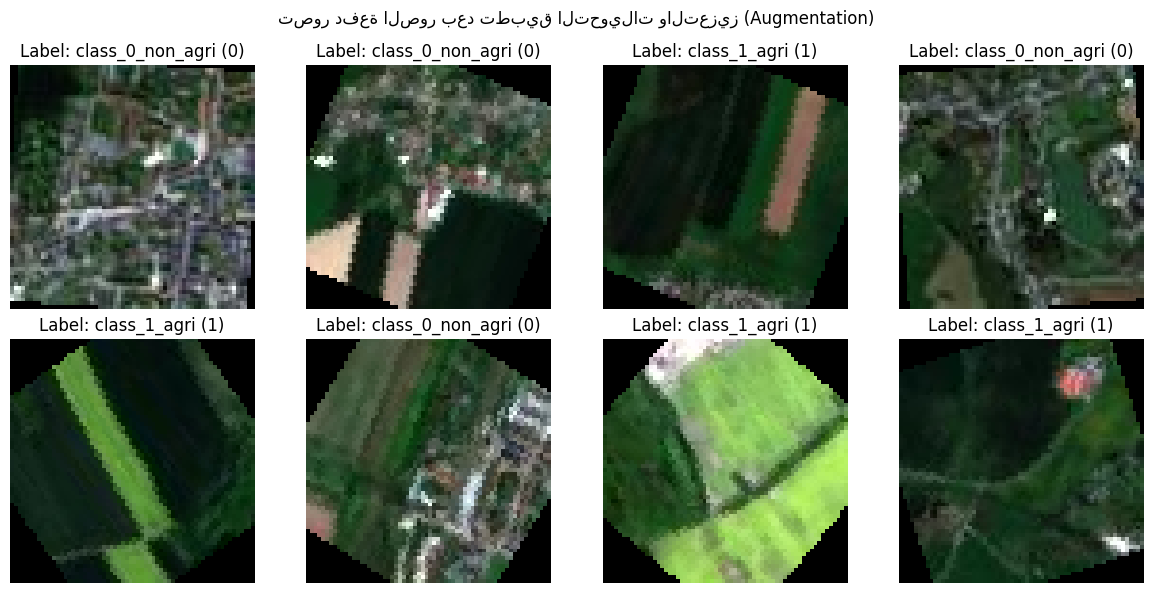

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# المتغيرات images_inbuilt و labels_inbuilt تم الحصول عليها من Task 4
BATCH_SIZE = 8

def imshow(img):
    """دالة مساعدة لإلغاء التطبيع وعرض الصورة"""
    # إلغاء التطبيع من [-1, 1] إلى [0, 1]
    img = img / 2 + 0.5  
    npimg = img.numpy()
    # تحويل الشكل من C,H,W إلى H,W,C للعرض بواسطة Matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.axis("off") # إزالة المحاور لتصوير أفضل

# عرض الصور
plt.figure(figsize=(12, 6))
# سنعرض الصور الثمانية في الدفعة
for i in range(BATCH_SIZE):
    ax = plt.subplot(2, 4, i + 1)
    imshow(images_inbuilt[i])
    # استخدام ربط الفئة بالمؤشر لطباعة اسم الفئة بدلاً من المؤشر
    class_names = ['class_0_non_agri', 'class_1_agri']
    label_index = labels_inbuilt[i].item()
    plt.title(f"Label: {class_names[label_index]} ({label_index})")
    
plt.suptitle("تصور دفعة الصور بعد تطبيق التحويلات والتعزيز (Augmentation)")
plt.tight_layout()
plt.show()

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # الطبقة التلافيفية الأولى: 3 قنوات (RGB) إلى 16 مرشح (Filters)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        
        # الطبقة التلافيفية الثانية: 16 قناة إلى 32 مرشح
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        # الطبقة الخطية الأولى (تصنيف): يتم حساب حجم المدخلات بناءً على حجم الصورة
        # (32 قناة * 16 * 16 بعد التجميع مرتين)
        self.fc1 = nn.Linear(32 * 16 * 16, 2) # 2 مخرجات لعدد الفئات

    def forward(self, x):
        # 1. الطبقة الأولى: Conv -> ReLU -> MaxPool (الحجم: 64 -> 32)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        
        # 2. الطبقة الثانية: Conv -> ReLU -> MaxPool (الحجم: 32 -> 16)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        
        # 3. تسطيح (Flattening) لتحويل المخرجات إلى متجه أحادي الأبعاد
        x = torch.flatten(x, 1) # يبدأ التسطيح من البعد 1 (C, H, W)
        
        # 4. الطبقة الخطية للتصنيف النهائي (Softmax ضمني عبر CrossEntropyLoss)
        x = self.fc1(x)
        return x

In [33]:
import torch

# إنشاء كائن النموذج (هذا هو التنفيذ الصامت)
model = SimpleCNN()

# طباعة هيكل النموذج (هذا هو الإخراج الذي تبحث عنه)
print(model)

# فحص شكل المخرجات (اختياري، للتحقق من أن حجم الإدخال/الإخراج صحيح)
dummy_input = torch.randn(8, 3, 64, 64)
output = model(dummy_input)

print(f"\nشكل مخرجات النموذج (Batch Size x Num Classes): {output.shape}")

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=2, bias=True)
)

شكل مخرجات النموذج (Batch Size x Num Classes): torch.Size([8, 2])


In [34]:
import torch.nn as nn
import torch.optim as optim

# Task 7: تحديد دالة الخسارة والمُحسّن
learning_rate = 0.001

# دالة الخسارة
criterion = nn.CrossEntropyLoss()

# المُحسّن (يأخذ جميع معاملات النموذج 'model.parameters()' للمراجعة)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("تم تحديد دالة الخسارة والمُحسّن بنجاح.")

تم تحديد دالة الخسارة والمُحسّن بنجاح.


In [35]:
# Task 8: تنفيذ حلقة التدريب

num_epochs = 5
total_steps = len(imagefolder_loader) # العدد الكلي للدفعات في حقبة واحدة

# تعيين النموذج لوضع التدريب
model.train()

print("بدء التدريب...")

for epoch in range(num_epochs):
    running_loss = 0.0
    
    # التكرار على جميع الدفعات في مجموعة البيانات
    for i, (images, labels) in enumerate(imagefolder_loader):
        
        # 1. تصفير التدرجات (لتجنب تراكمها من الدفعة السابقة)
        optimizer.zero_grad()
        
        # 2. التمرير الأمامي: الحصول على توقعات النموذج
        outputs = model(images)
        
        # 3. حساب الخسارة
        loss = criterion(outputs, labels)
        
        # 4. التمرير الخلفي: حساب التدرجات
        loss.backward()
        
        # 5. تحديث الأوزان
        optimizer.step()
        
        running_loss += loss.item()

    # طباعة متوسط الخسارة لكل حقبة
    avg_epoch_loss = running_loss / total_steps
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

print("تم الانتهاء من التدريب بنجاح.")

بدء التدريب...
Epoch [1/5], Loss: 0.0802
Epoch [2/5], Loss: 0.0307
Epoch [3/5], Loss: 0.0229
Epoch [4/5], Loss: 0.0266
Epoch [5/5], Loss: 0.0254
تم الانتهاء من التدريب بنجاح.


In [ ]:
# Task 9: تقييم أداء النموذج

# 1. تعيين النموذج لوضع التقييم (Evaluation Mode)
model.eval() # هذا يوقف وظائف مثل Dropout و BatchNorm إذا كانت موجودة

correct = 0
total = 0

# إيقاف حساب التدرجات أثناء التقييم لتوفير الذاكرة والوقت
with torch.no_grad():
    
    # التكرار على جميع الدفعات في الـ DataLoader
    for images, labels in imagefolder_loader:
        
        # التمرير الأمامي: الحصول على توقعات النموذج
        outputs = model(images)
        
        # الحصول على التنبؤات (التي لديها أعلى قيمة Logit)
        # max(1) يعطي القيمة القصوى (Value) وموقعها (Index) على طول البعد 1 (الفئات)
        _, predicted = torch.max(outputs.data, 1)
        
        # تحديث المجموع الكلي والتوقعات الصحيحة
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# طباعة النتيجة النهائية
accuracy = 100 * correct / total
print(f"تم الانتهاء من التقييم.")
print(f'دقة النموذج على {total} صورة هي: {accuracy:.2f} %')